# IN THIS PROJECT, I ANALYSED OUR ACCOUNTING ALUMNI WHATSAPP GROUP PAGE TO SEE INTERESTING INSIGHTS

In [25]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=14,7
import emoji
#from Ipython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity="all"
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Performing some data wrangling 

In [33]:
#Load in th data
missing_values=["None","n/a"]
raw_data=pd.read_csv('COGNOSCENTI.txt',delimiter='\t',header=None,names=['text'],na_values=missing_values)
data=pd.read_csv('COGNOSCENTI.txt',delimiter='\t',header=None,names=['text'],na_values=missing_values)

In [34]:
#Check the first few rows of the data
data.head()

,text
0,"10/18/20, 22:00 - Messages and calls are end-t..."
1,"10/18/20, 21:59 - John changed this group's icon"
2,"8/25/14, 21:04 - +234 816 742 8335 created gro..."
3,"10/18/20, 21:55 - John added you"
4,"10/18/20, 21:56 - John changed the subject fro..."


In [35]:
#Extract datetime
data[['datetime','text_2']]=data["text"].str.split("-",1,expand=True)

In [36]:
#Check the first few rows after extracting the datetime
data.head()

,text,datetime,text_2
0,"10/18/20, 22:00 - Messages and calls are end-t...","10/18/20, 22:00",Messages and calls are end-to-end encrypted. ...
1,"10/18/20, 21:59 - John changed this group's icon","10/18/20, 21:59",John changed this group's icon
2,"8/25/14, 21:04 - +234 816 742 8335 created gro...","8/25/14, 21:04","+234 816 742 8335 created group ""HBD fikemi b..."
3,"10/18/20, 21:55 - John added you","10/18/20, 21:55",John added you
4,"10/18/20, 21:56 - John changed the subject fro...","10/18/20, 21:56","John changed the subject from ""HBD fikemi bab..."


In [37]:
#Examing the shape of the dataset
data.shape

(1360, 3)

In [38]:
#Drop the datetime_str column as we don't need it anymore
#data=data.drop(columns=['datetime_str'])
#Extract sender and message
data[['sender','text_message']]=data["text_2"].str.split(':',1,expand=True)



In [39]:
#Drop the text and text_2 columns as we don't need them anymore
data=data.drop(columns=["text","text_2"])
data.head()

,datetime,sender,text_message
0,"10/18/20, 22:00",Messages and calls are end-to-end encrypted. ...,None
1,"10/18/20, 21:59",John changed this group's icon,None
2,"8/25/14, 21:04","+234 816 742 8335 created group ""HBD fikemi b...",None
3,"10/18/20, 21:55",John added you,None
4,"10/18/20, 21:56","John changed the subject from ""HBD fikemi bab...",None


## Most poular message time using heatmap

In [10]:

#Extract the day of week and make it a column in the Data frame
data["datetime"]=pd.to_datetime(data["datetime"],errors='coerce')
data['day_of_week']=data["datetime"].dt.dayofweek+1

In [11]:
#Ensure the datetime is indeed in date format
data["datetime"]=pd.to_datetime(data["datetime"],errors='coerce')

In [12]:
#Extract the hour and make it a column in the Data Frame
data['hour_of_day']=data['datetime'].dt.hour

In [13]:
#Create a new object of the data counts
heatmap_data=data.groupby(['day_of_week','hour_of_day']).size()
heatmap_data=heatmap_data.unstack()

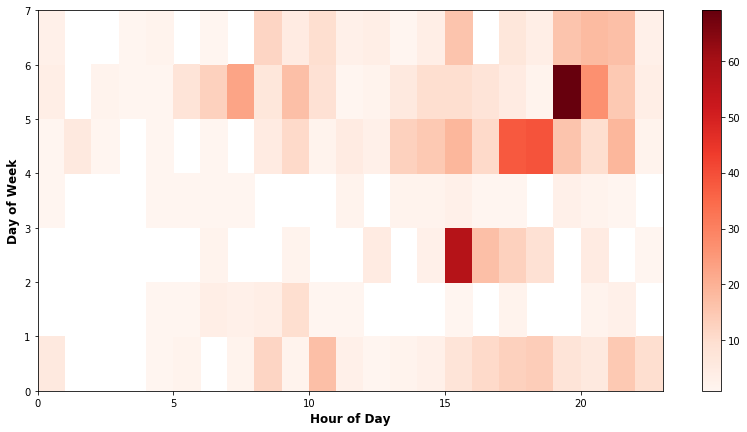

In [26]:
#Create the heatmap
plt.pcolor(heatmap_data,cmap='Reds')
plt.xlabel("Hour of Day",fontsize='12',fontweight='bold')
plt.ylabel("Day of Week",fontsize='12',fontweight='bold')
plt.colorbar()
plt.show()

In [17]:
#Checking the heatmap object created
heatmap_data

hour_of_day,0.0,1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
day_of_week,,,,,,,,,,,,,,,,,,,,,,,
1.0,6.0,NaN,NaN,NaN,1.0,2.0,NaN,2.0,12.0,2.0,17.0,3.0,1.0,2.0,3.0,8.0,11.0,13.0,14.0,8.0,6.0,15.0,10.0
2.0,NaN,NaN,NaN,NaN,1.0,1.0,4.0,3.0,4.0,10.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,2.0,3.0,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,5.0,NaN,3.0,57.0,17.0,13.0,9.0,NaN,5.0,NaN,1.0
4.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,3.0,1.0,1.0,NaN,3.0,2.0,1.0,NaN
5.0,1.0,6.0,1.0,NaN,1.0,NaN,1.0,NaN,5.0,11.0,2.0,5.0,3.0,13.0,15.0,19.0,11.0,38.0,39.0,16.0,10.0,19.0,2.0
6.0,4.0,NaN,2.0,1.0,1.0,8.0,13.0,23.0,7.0,17.0,9.0,1.0,2.0,6.0,10.0,10.0,8.0,5.0,2.0,69.0,27.0,15.0,4.0
7.0,3.0,NaN,NaN,1.0,2.0,NaN,1.0,NaN,12.0,5.0,10.0,3.0,4.0,1.0,4.0,16.0,NaN,7.0,4.0,16.0,18.0,17.0,3.0


## Messages by Top 10 Senders

In [18]:
#Create sender count as a series
sender_count_series=data.groupby(['sender']).size().sort_values(ascending=False)[:10]

In [19]:
#Creat sender count as a dataframe
sender_count_df=pd.DataFrame(sender_count_series)

In [20]:
#Reset index in order to rename column properly
sender_count_df=sender_count_df.reset_index()


In [21]:
#Rename columns properly
sender_count_df.columns=['sender','count']

In [22]:
#Check the data
sender_count_df.head()

,sender,count
0,Highcomm,45
1,+234 706 613 2074,36
2,+234 810 004 3747,32
3,+234 816 512 0053,22
4,Oye,21


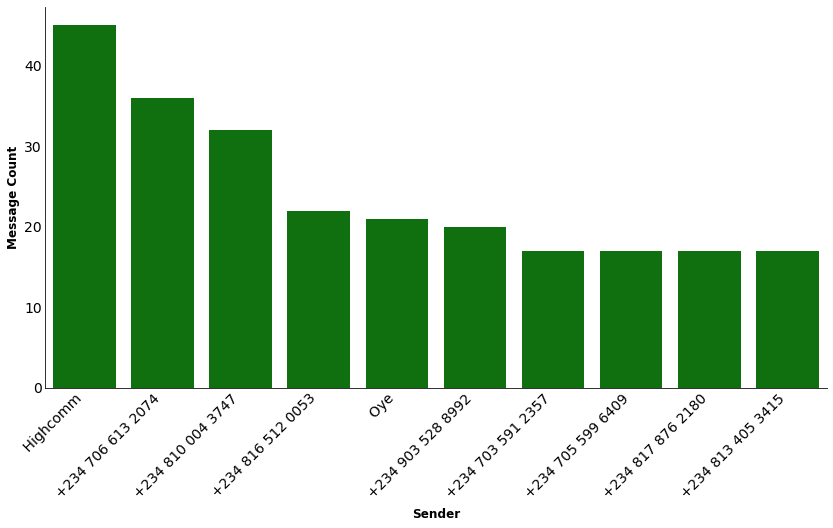

In [24]:
#Plot bar chart with sender message counts
#plt.figure(figsize=(15,5))
fontdict={'fontsize':12,'weight':'bold'}


fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(x='sender',y='count',color='green',data=sender_count_df,ax=ax)
ax.set_xlabel('Sender',fontdict=fontdict)
ax.set_ylabel('Message Count',fontdict=fontdict)
ax.tick_params(labelsize=14,length=0) #Remove the tick line and also increase the font size
plt.xticks(rotation=45,ha="right") #Rotate the xlabel
#Remove the borders/spines of the chart from the top and the right side
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show();